<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Python_para_Data_Science/blob/main/Python_Scikit_Learn_regress%C3%A3o%2C_classifica%C3%A7%C3%A3o_e_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O que é a regressão**

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [ ]:
import pandas as pd

In [ ]:
passageiros = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/curso_scikitlearn/aula1/Passageiros.csv")
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [ ]:
import seaborn as sns

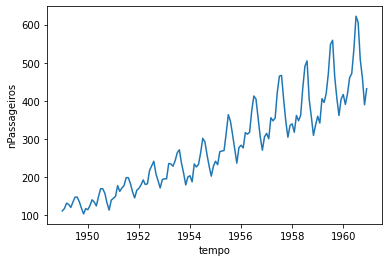

In [ ]:
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

**Regressão linear**

In [ ]:
Tempo = passageiros.iloc[:,:-1].values

In [ ]:
nPassageiros = passageiros.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, test_size = 0.3)

In [ ]:
from sklearn import linear_model

In [ ]:
regressor = linear_model.LinearRegression()

In [ ]:
regressor.fit(Tempo_treino, nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [ ]:
import numpy as np

In [ ]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })

In [ ]:
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_teste})

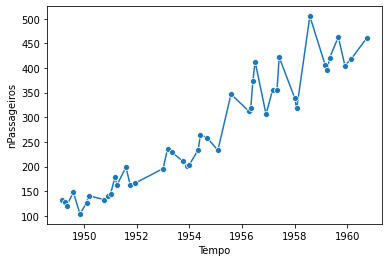

In [ ]:
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_teste, marker='o')

# **Regressão com SVMs**

**Medindo a qualidade da regressão**

In [ ]:
regressor.coef_

array([32.22001741])

In [ ]:
regressor.intercept_

-62708.84428997767

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.9070468671066438

**Máquinas de vetores de suporte (teoria)**

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor_svr = SVR()

In [ ]:
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [ ]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito_svr})

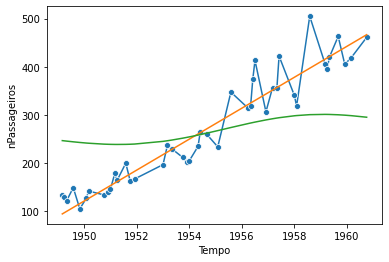

In [ ]:
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito)
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr)

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor_svr = SVR(C=100)

In [ ]:
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.3554642919690615

In [ ]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.9070468671066438

# **Classificação**

In [ ]:
celular  = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/curso_scikitlearn/aula3/Celular.csv", delimiter=",")
celular .head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


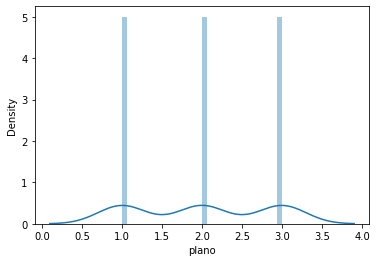

In [ ]:
sns.distplot(celular["plano"], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


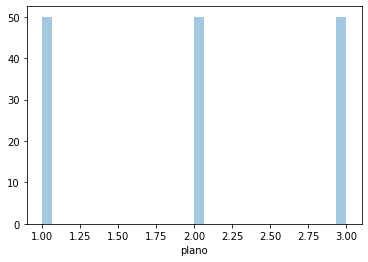

In [ ]:
sns.distplot(celular["plano"], bins=30, kde=False)

In [ ]:
X = celular.iloc[:,:-1].values

In [ ]:
y = celular.iloc[:,4].values

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn import tree

In [ ]:
classificador_arvore = tree.DecisionTreeClassifier()

In [ ]:
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)

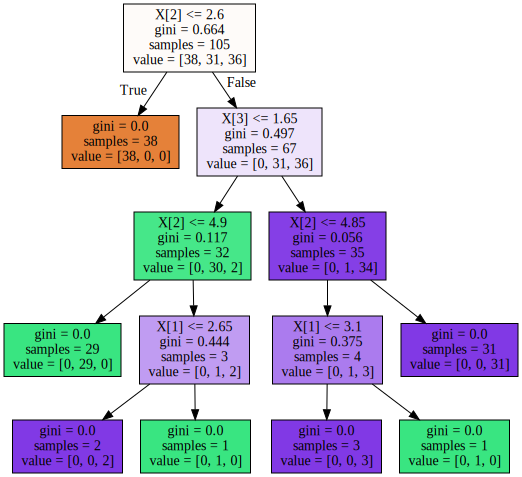

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
X[3] <= 0.75
gini = 0.664
samples = 105
value = [34,32,39]

In [ ]:
gini=0.0
samples=34
value=[43,0,0]

In [ ]:
plano_previsto = classificador_arvore.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


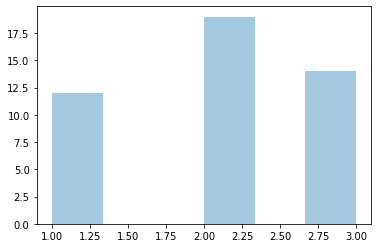

In [ ]:
sns.distplot(y_teste, bins=6, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


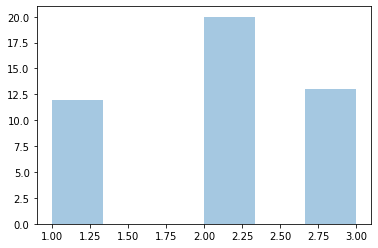

In [ ]:
sns.distplot(plano_previsto, bins=6, kde=False)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_teste, plano_previsto)*100

93.33333333333333

**K Vizinhos mais próximos**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classificador_vizinho = KNeighborsClassifier(5)

In [ ]:
classificador_vizinho.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
plano_previsto_v = classificador_vizinho.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


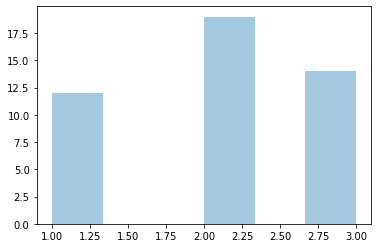

In [ ]:
sns.distplot(y_teste, bins=6, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


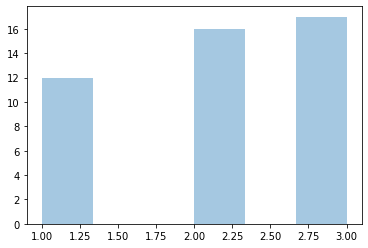

In [ ]:
sns.distplot(plano_previsto_v, bins=6, kde=False)

In [ ]:
accuracy_score(y_teste, plano_previsto_v)*100

93.33333333333333

# **Clustering**

**Problema de agrupamento**

In [ ]:
engajamento  = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/curso_scikitlearn/aula4/Engajamento.csv")
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [ ]:
X = engajamento.iloc[:,:-1]
X

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
...,...,...
4995,991.447007,5.428443
4996,996.841049,15.504041
4997,991.723479,4.750185
4998,996.695706,14.807956


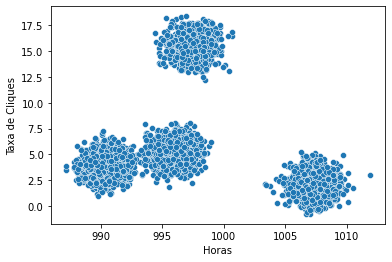

In [ ]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X)

**KMeans - Agrupamento aplicação**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

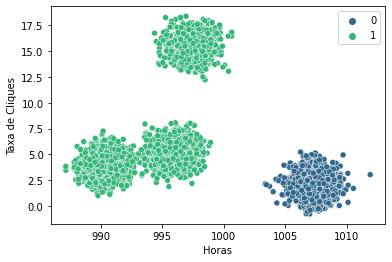

In [ ]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X, hue=kmeans.labels_,
                palette='viridis')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

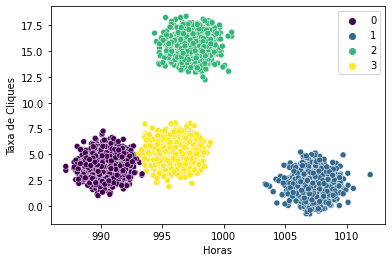

In [ ]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X, hue=kmeans.labels_,
                palette='viridis')

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
clustering_o = OPTICS(min_samples=8).fit(X)

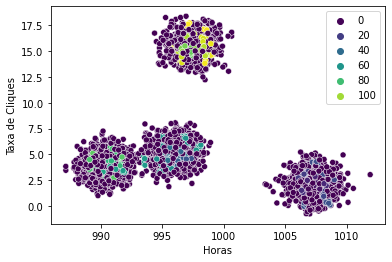

In [ ]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X, hue=clustering_o.labels_,
                palette='viridis')